In [65]:
### Date - 18/10/2023
### Team ID - 
### Project Title - 

### IMPORTING THE REQUIRED MODULES

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load the data

In [67]:
data = pd.read_csv('spam.csv')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [68]:
# Data preprocessing
# Convert labels to binary values (0 for 'ham', 1 for 'spam')

In [69]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

## Split the data into training and testing sets

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


## Text vectorization using TF-IDF (Term Frequency-Inverse Document Frequency)


In [71]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Train an SVM classifier

In [72]:
spam_classifier = SVC(kernel='linear')
spam_classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Make predictions

In [73]:
y_pred = spam_classifier.predict(X_test)

## Evaluate the classifier

In [74]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9820466786355476
Confusion Matrix:
 [[954   3]
 [ 17 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       957
           1       0.98      0.89      0.93       157

    accuracy                           0.98      1114
   macro avg       0.98      0.94      0.96      1114
weighted avg       0.98      0.98      0.98      1114



## Visualize the confusion matrix

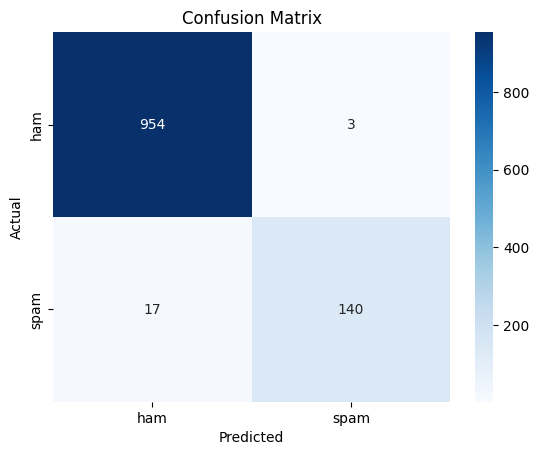

In [75]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

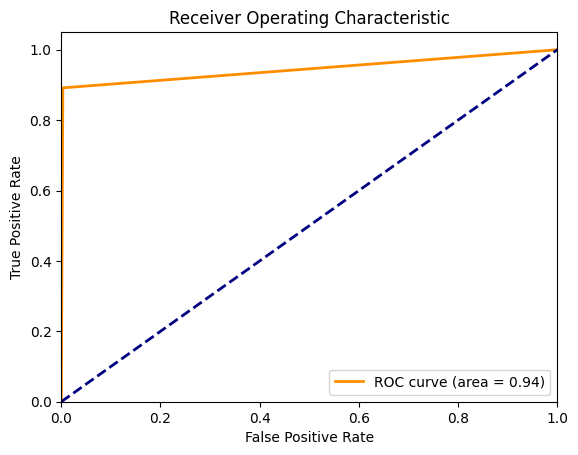

In [76]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [77]:
import joblib

# Save the model to a file
joblib.dump(data, 'spam_classifier_model.pkl')

# Load the model later
loaded_model = joblib.load('spam_classifier_model.pkl')


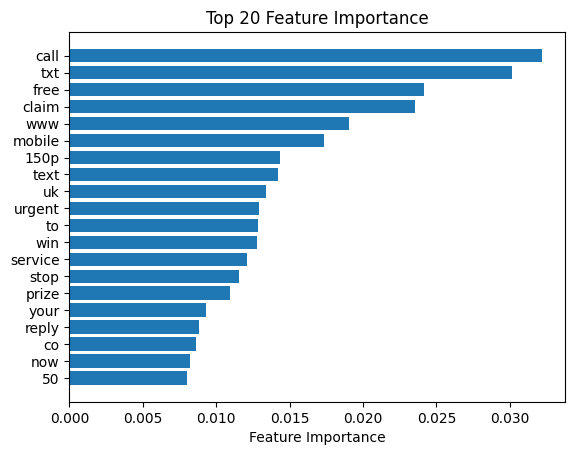

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Plot feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()
sorted_idx = np.argsort(feature_importance)[-20:]  # Top 20 features
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance')
plt.show()


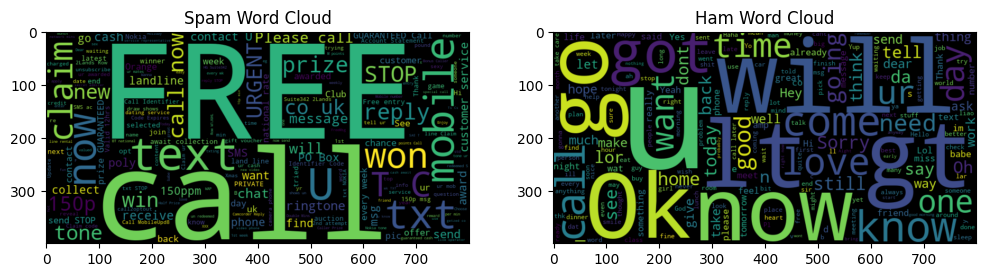

In [79]:
from wordcloud import WordCloud

spam_text = data[data['label'] == 1]['text']
ham_text = data[data['label'] == 0]['text']

# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400).generate(' '.join(spam_text))
ham_wordcloud = WordCloud(width=800, height=400).generate(' '.join(ham_text))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')

plt.show()


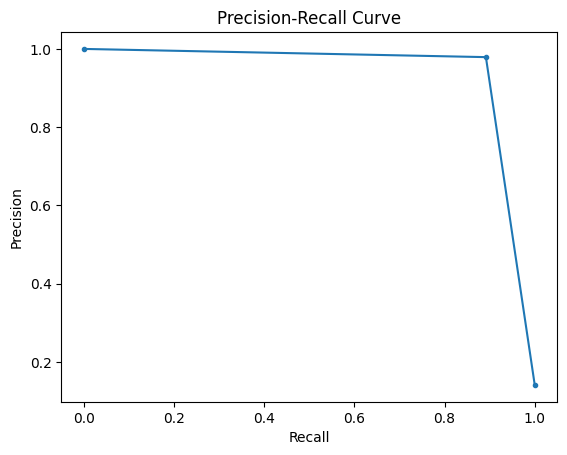

In [80]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


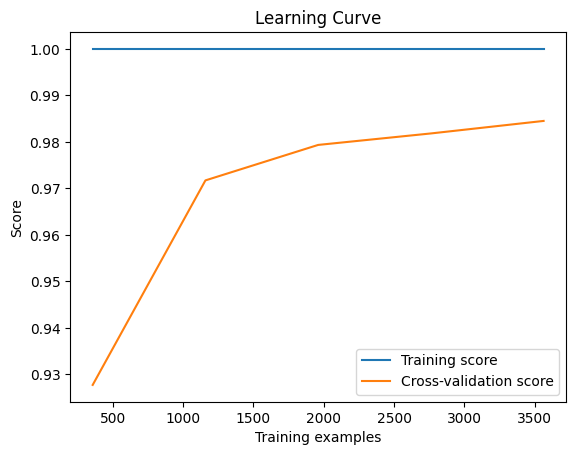

In [81]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()
